In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Comment toxicity/train.csv")

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
from tensorflow.keras.layers import TextVectorization

In [9]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [10]:
X = df['comment_text']
y = df.drop(['id','comment_text'],axis=1).values

In [11]:
max_words = 200000

In [12]:
vectorizer = TextVectorization(max_tokens= max_words,
                               output_sequence_length = 1800,
                               output_mode = 'int')

In [13]:
vectorizer.adapt(X.values)

In [14]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [16]:
vectorizer('Hello there')[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([288,  41])>

In [17]:
vec_text = vectorizer(X.values)

In [18]:
vec_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [19]:
#Data pipeline
dataset = tf.data.Dataset.from_tensor_slices((vec_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [20]:
batch_x,batch_y = dataset.as_numpy_iterator().next()

In [21]:
batch_x

array([[  190,   128,    94, ...,     0,     0,     0],
       [   46,  1592,    11, ...,     0,     0,     0],
       [  776,  1062,   844, ...,     0,     0,     0],
       ...,
       [  718, 98829,  5737, ...,     0,     0,     0],
       [19312,     8,   215, ...,     0,     0,     0],
       [  136,  2326,    12, ...,     0,     0,     0]])

In [22]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [23]:
len(dataset)

9974

In [24]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [25]:
train_generator = train.as_numpy_iterator()

In [26]:
train_generator.next()

(array([[  606,  1298,   450, ...,     0,     0,     0],
        [  104,   190,     2, ...,     0,     0,     0],
        [   48,    15,    55, ...,     0,     0,     0],
        ...,
        [  171,    70,   115, ...,     0,     0,     0],
        [35400,   331,   301, ...,     0,     0,     0],
        [   12,   184,    15, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [28]:
len(y[0])

6

In [29]:
from keras.api._v2.keras import activations
model = Sequential()
model.add(Embedding(max_words+1, 32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(6,activation = 'sigmoid'))

In [30]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [32]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)

In [33]:
toxic=model.fit(train,epochs=10,validation_data = val,callbacks=[callback])

Epoch 1/10
6981/6981 [==============================] - 786s 111ms/step - loss: 0.0628 - val_loss: 0.0503
Epoch 2/10
6981/6981 [==============================] - 614s 88ms/step - loss: 0.0457 - val_loss: 0.0403
Epoch 3/10
6981/6981 [==============================] - 624s 89ms/step - loss: 0.0409 - val_loss: 0.0371
Epoch 4/10
6981/6981 [==============================] - 633s 91ms/step - loss: 0.0370 - val_loss: 0.0326
Epoch 5/10
6981/6981 [==============================] - 609s 87ms/step - loss: 0.0327 - val_loss: 0.0291
Epoch 6/10
6981/6981 [==============================] - 610s 87ms/step - loss: 0.0298 - val_loss: 0.0280
Epoch 7/10
6981/6981 [==============================] - 613s 88ms/step - loss: 0.0267 - val_loss: 0.0230
Epoch 8/10
6981/6981 [==============================] - 604s 87ms/step - loss: 0.0240 - val_loss: 0.0203
Epoch 9/10
6981/6981 [==============================] - 605s 87ms/step - loss: 0.0213 - val_loss: 0.0186
Epoch 10/10
6981/6981 [==============================]

In [34]:
model.save("/content/drive/MyDrive/Comment toxicity/toxic.h5")

In [56]:
#toxic = tf.keras.models.load_model("/content/drive/MyDrive/Comment toxicity/toxic.h5")

In [38]:
#toxic.summary()

In [36]:
toxic.history

{'loss': [0.06277912110090256,
  0.045738719403743744,
  0.04091067612171173,
  0.036971673369407654,
  0.03272456303238869,
  0.029830755665898323,
  0.026671787723898888,
  0.02401178702712059,
  0.021269541233778,
  0.018983229994773865],
 'val_loss': [0.05030173435807228,
  0.040250569581985474,
  0.037135448306798935,
  0.032608069479465485,
  0.029130835086107254,
  0.027999963611364365,
  0.02300575003027916,
  0.02033393085002899,
  0.01861930452287197,
  0.015365557745099068]}

<Figure size 1200x1000 with 0 Axes>

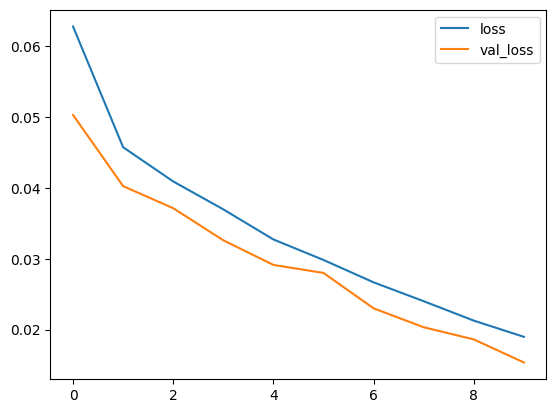

In [37]:
plt.figure(figsize=(12,10))
pd.DataFrame(toxic.history).plot()
plt.show()

In [48]:
input_text = vectorizer("I will kill you")

In [49]:
input_text[:3]

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([  8,  44, 950])>

In [50]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 52ms/step


array([[0.9032913 , 0.07300611, 0.01913805, 0.71265584, 0.02063262,
        0.01082938]], dtype=float32)

In [51]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [52]:
batch =test.as_numpy_iterator().next()

In [54]:
batch_x,batch_y = test.as_numpy_iterator().next()

In [58]:
(model.predict(batch_x) > 0.5).astype(int)

1/1 [==============================] - 0s 143ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [59]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [72]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [76]:
precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

In [77]:
for batch in test.as_numpy_iterator():
  X_true, y_true = batch
  y_pred = model.predict(X_true)
  y_true = y_true.flatten()
  y_pred = y_pred.flatten()
  precision.update_state(y_true,y_pred)
  recall.update_state(y_true,y_pred)
  accuracy.update_state(y_true,y_pred)

1/1 [==============================] - 0s 57ms/step


In [75]:
print(f'Precision:{precision.result().numpy()}',
      f'Recall:{recall.result().numpy()}',
      f'Accuracy:{accuracy.result().numpy()}')

Precision:0.9212598204612732 Recall:0.9124783277511597 Accuracy:0.0009925609920173883


In [69]:
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
 

In [71]:
import gradio as gr

In [112]:
def comment(comment):
  vect_comm = vectorizer([comment])
  res = model.predict(vect_comm)
  text  = ''
  for idx, col in enumerate(df.columns[2:]):
    text += '{}: {}\n'.format(col,res[0][idx]>0.5)
  return text

In [113]:
interface = gr.Interface(fn=comment,
                        inputs = gr.components.Textbox(lines=2,placeholder='Comment to score'),
                         outputs = 'text')

In [114]:
interface.launch(share = True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://455f3b5510147e733e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 67ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7864 <> https://455f3b5510147e733e.gradio.live
